<a href="https://colab.research.google.com/github/KirttiphoomEarth/IMAGE-PROCESSING/blob/main/image_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 67.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorf

In [2]:
#Array, image processing
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
#from keras.wrappers.scikit_learn import Keras Regression
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# io
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


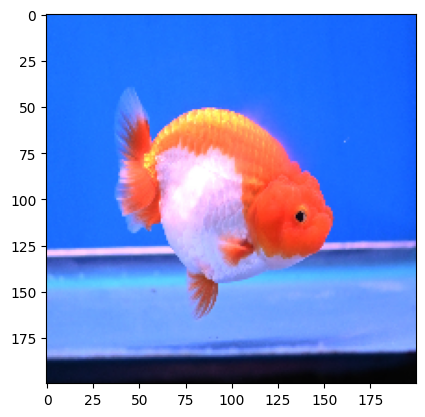

In [4]:
image2 = cv2.imread("/content/drive/MyDrive/goldfish.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
#image = cv2.imread("/content/drive/MyDrive/Grid_Image.jpg")
image = cv2.imread("/content/drive/MyDrive/110564.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2, (200, 200))
imgplot = plt.imshow(image2)

In [5]:
# Define resize factor
Reduce_factors = [2, 4, 5, 7, 8, 10, 15] # อย่างน้อย 3 ค่า

#Scale_factors = 1/ Reduce_factors
Scale_factors = []
for i in Reduce_factors:
  Scale_factors.append(1/i)
print(Scale_factors)

[0.5, 0.25, 0.2, 0.14285714285714285, 0.125, 0.1, 0.06666666666666667]


In [6]:
# Define interpolation method
inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
# rows, cols = (7, 4)
# image_result = [[0]*cols]*rows\
image_result = np.zeros((7,4))

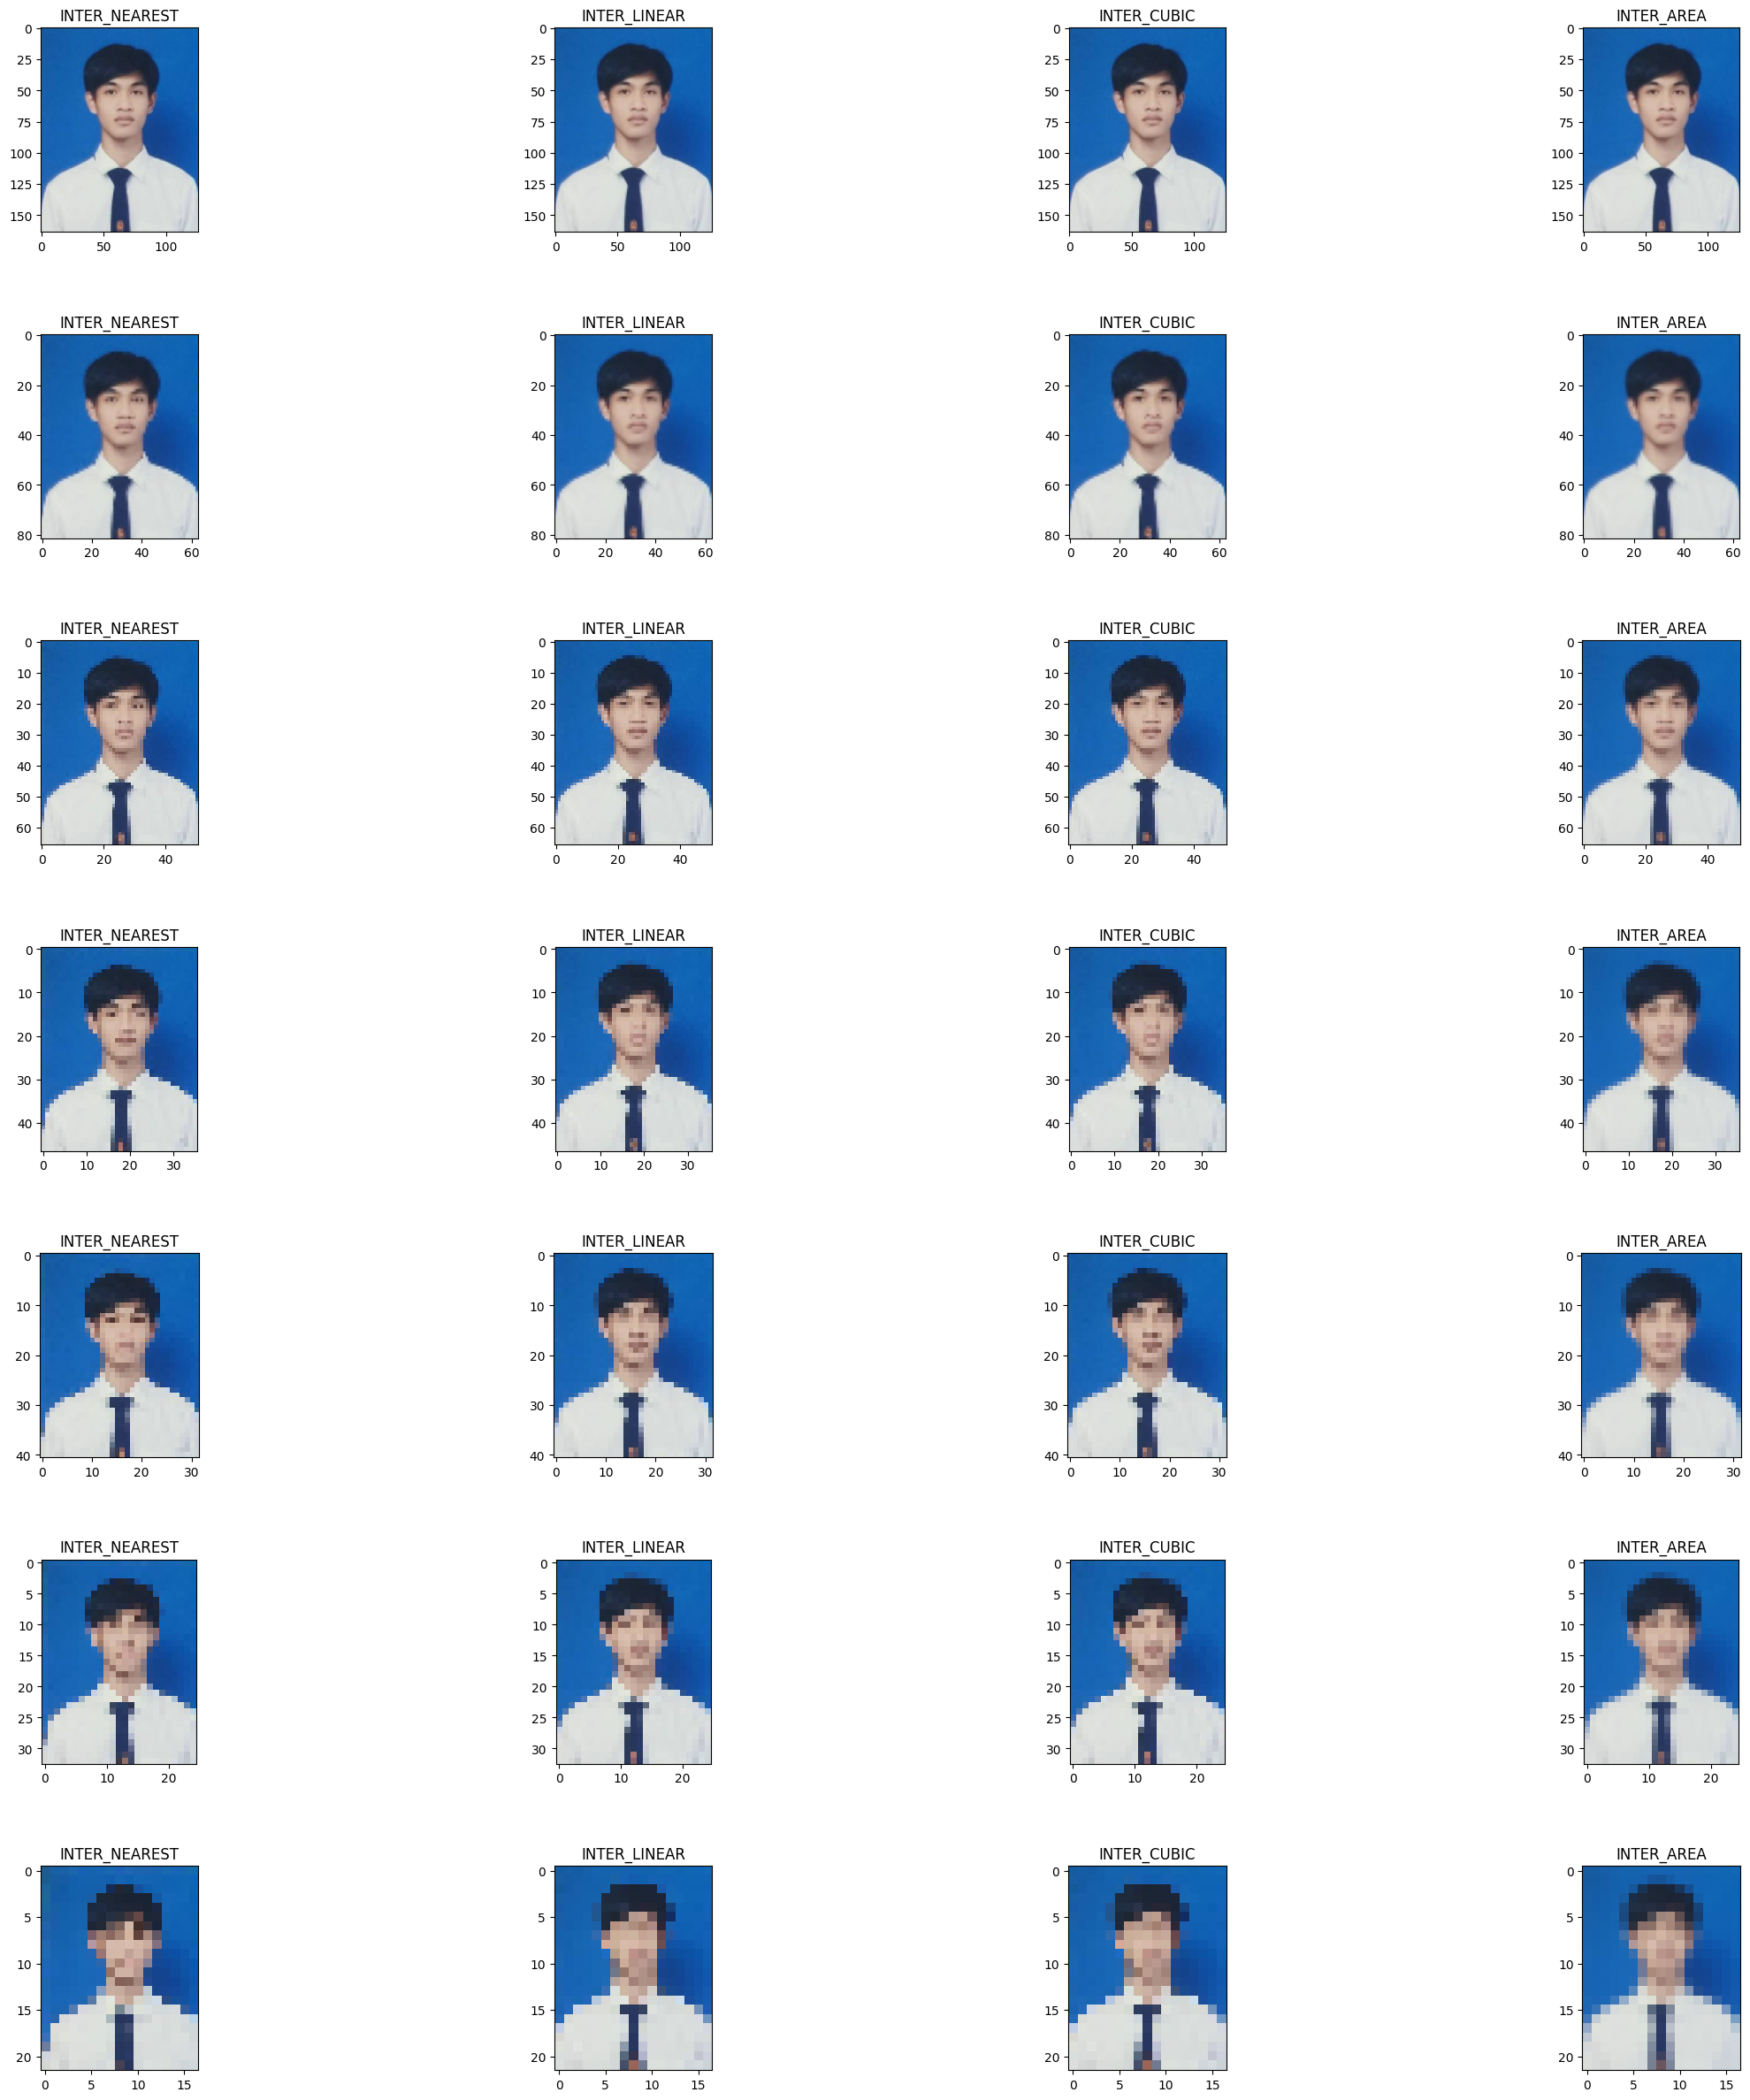

In [7]:
fig, axs = plt.subplots(7,4, figsize=(30, 30), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0,hspace=0.5)

for i in range(7):
  for j in range(4):
    x = cv2.resize(image, None, fx= Scale_factors[i], fy= Scale_factors[i], interpolation = inter_methods[j])
    axs[i, j].imshow(x)
    if j == 0:
      axs[i, j].set_title("INTER_NEAREST")
    elif j == 1:
      axs[i, j].set_title("INTER_LINEAR")
    elif j == 2:
      axs[i, j].set_title("INTER_CUBIC")
    elif j == 3:
      axs[i, j].set_title("INTER_AREA")

# 5.2

In [8]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

In [38]:
# Define parameters
Npic = 9 # number of Picture
rotation_range = 90 # degrees ?
width_shift_range = 0.1  # shift left-right pixels ? if 0-1 is 0%-100% if > 1 will be pixels (not confirm)
height_shift_range = 0.1 # shift up-down pixels ?
shear_range = 0.1
zoom_range  = 0.1 # scale what unit?
horizontal_flip = True
#vertical_flip = False

In [10]:
#Prepare Gaussian Noise Function
# def add_gaussian_noise(images):
#   row,col,ch= images.shape
#   mean = 0
#   #var = 0.1
#   var = 100
#   sigma = var**0.5
#   gauss = np.random.normal(mean,sigma,(row,col,ch))
#   gauss = gauss.reshape(row,col,ch)
#   img_noisy = images + gauss
#   return img_noisy
#def add_gaussian_noise(train_x):
# noise_factor = 0.2
# x_train_noisy = train_x + noise_factor * tf.random.normal(shape=train_x.shape)
# #x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

# x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
# #x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)
def add_gaussian_noise_1(train_x):
  noise_mean = 0
  noise_std = 10
  noise_factor = 5
  train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape) )
  return train_x_noise
#size=(200,200,1)
#return train_x_noise

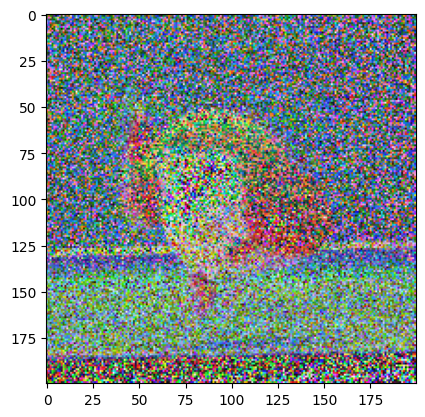

In [11]:
fish_nosiy = add_gaussian_noise_1(image2)
#numpy_array = tf. make_tensor_proto(fish_nosiy)
#x = tf.make_ndarray(numpy_array)
x = plt.imshow(fish_nosiy.astype('uint8'))
#x = plt.imshow(fish_nosiy)
#print(fish_nosiy)

In [12]:
#print(type(image2))
image2.shape

(200, 200, 3)

In [13]:
#row,col,ch= image2.shape
#image2.reshape((2, row, col, ch))
#image2_reshape = np.reshape(image2,(2, row, col, ch))
data1 = np.expand_dims(image, axis=0)
data1.shape

(1, 329, 253, 3)

In [14]:
# for i in range(65):
#     image_sum = np.zeros((i))
# image_sum.shape
frames = []

In [39]:
# Define ImageDataGenerator with parameters
for m in fill_method:
  datagen = ImageDataGenerator(rotation_range=rotation_range,
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range,
                                 shear_range=shear_range,
                                 zoom_range=zoom_range,
                                 horizontal_flip=horizontal_flip,
                                 #vertical_flip=vertical_flip,
                                 fill_mode = m)
  # Creates our batch of one image
  pic = datagen.flow(data1, batch_size =2)

  # Random generate transformed images and write to a video file
  for i in range(1, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    #print(im_result)
    #image_sum[i] = im_result
    frames.append(im_result)

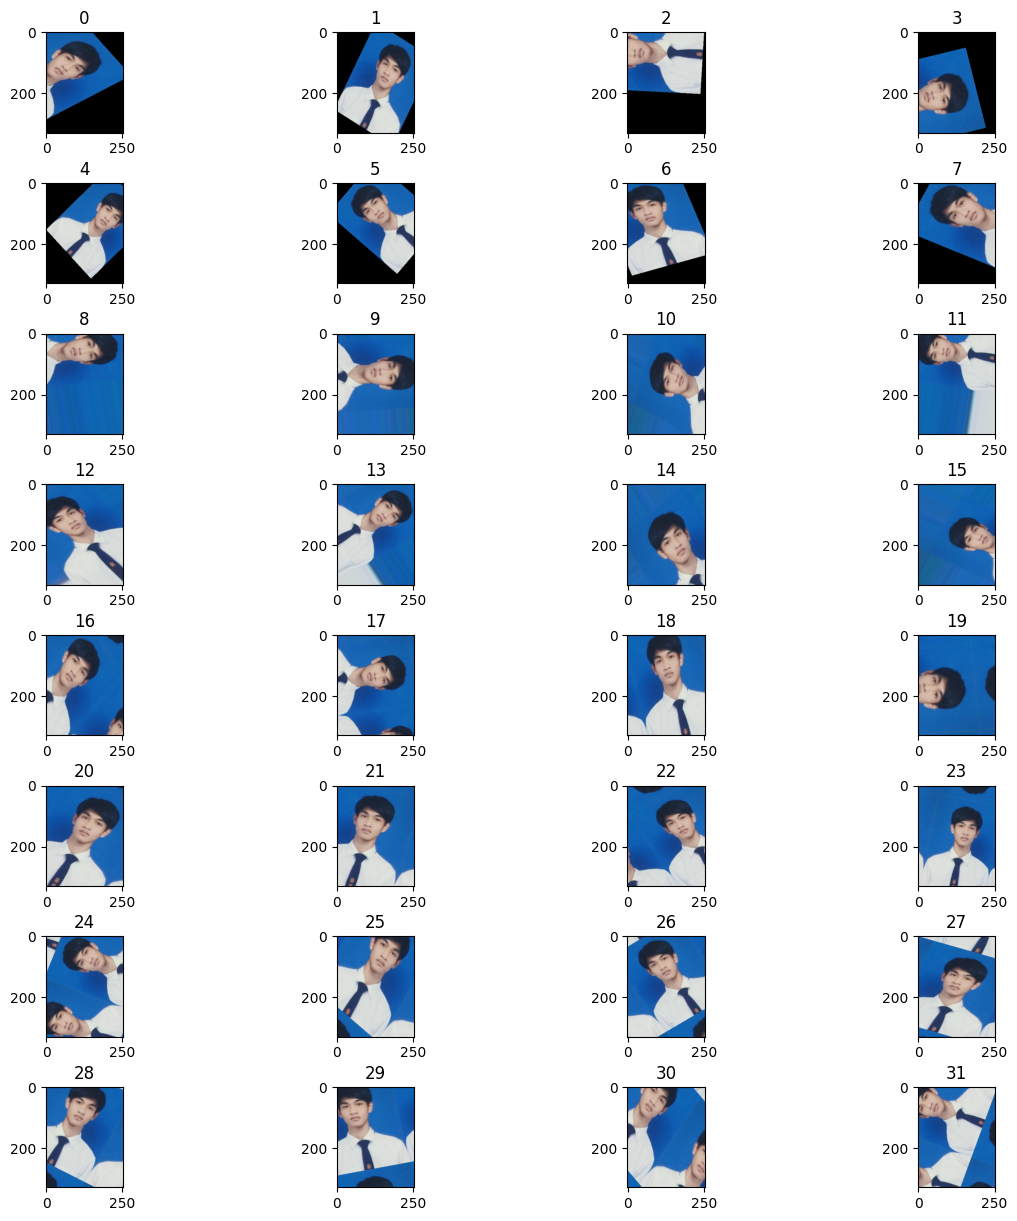

In [40]:
fig, axs = plt.subplots(8,4, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(32):
    axs[i].imshow(frames[i],cmap='viridis')
    axs[i].set_title(i)

In [17]:
frames2 = []

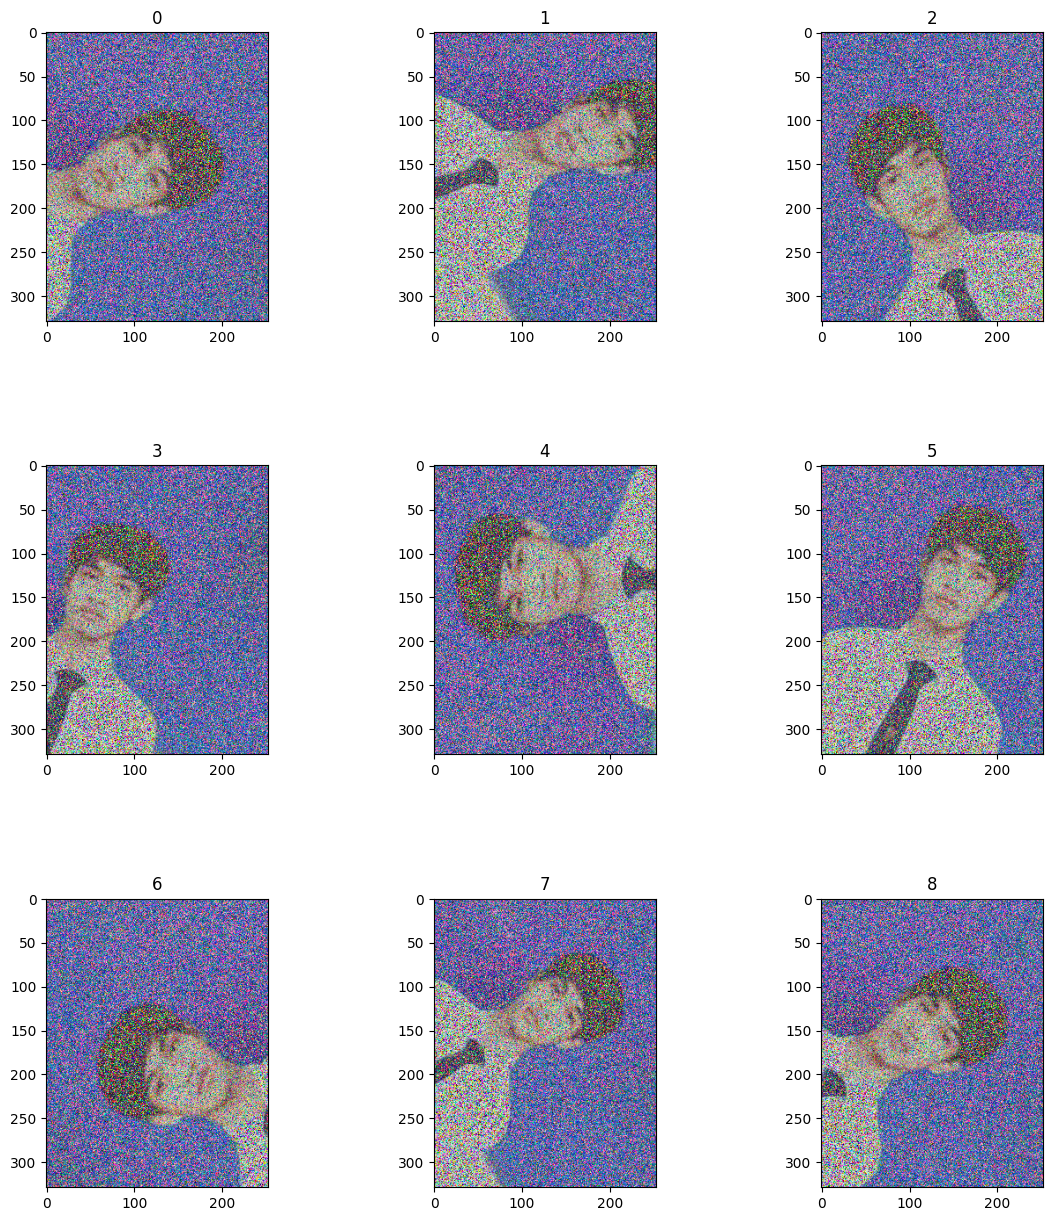

In [18]:
# Define ImageDataGenerator with parameters
fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for m in fill_method:
  datagen = ImageDataGenerator(  preprocessing_function = add_gaussian_noise_1,
                                 rotation_range=rotation_range,
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range,
                                 shear_range=shear_range,
                                 zoom_range=zoom_range,
                                 horizontal_flip=horizontal_flip
                                 #vertical_flip=vertical_flip,
                                 #fill_mode = m)
                                 )
  # Creates our batch of one image
  pic1 = datagen.flow(data1, batch_size =16)

  # Random generate transformed images and write to a video file
  for i in range(Npic):
    batch1 = pic1.next()
    im_result2 = batch1[0].astype('uint8')
    #print(im_result)
    #image_sum[i] = im_result
    #frames2.append(im_result2)
    axs[i].imshow(im_result2)
    axs[i].set_title(i)



# 5.3

In [41]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

In [42]:
(x_train, _), (x_test, _) = fashion_mnist.load_data() # load images from dataset
x_train = x_train/255.0
x_test =x_test/255.0 # normalized image intensity
x_train, x_test= train_test_split(x_train, random_state=42, test_size=0.2) # create train data, test data
x_train, x_val = train_test_split(x_train, random_state=42, test_size=0.3) # create train data, validation data

In [43]:
x_train.shape, x_test.shape

((33600, 28, 28), (12000, 28, 28))

In [44]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [45]:
x_train.shape, x_test.shape , x_val.shape

((33600, 28, 28, 1), (12000, 28, 28, 1), (14400, 28, 28, 1))

In [46]:
def add_gaussian_noise_1(train_x):
  noise_mean = 0
  noise_std = 0.3
  noise_factor = 0.2
  train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=(28,28,1)) )
  return train_x_noise

In [47]:
x_test_noisy = []

In [48]:
datagen = ImageDataGenerator(   rotation_range=rotation_range,
                                width_shift_range=width_shift_range,
                                height_shift_range=height_shift_range,
                                shear_range=shear_range,
                                zoom_range=zoom_range,
                                horizontal_flip=horizontal_flip,
                                preprocessing_function = add_gaussian_noise_1,
                                #vertical_flip=vertical_flip,
                                fill_mode = m
                                )

x_batch = datagen.flow(x_train, batch_size=16)


In [49]:
x_test_noisy = []
x_train_noisy = []
x_val_noisy = []

In [50]:
# Define ImageDataGenerator with

for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_train_noisy.append(augmented_image)

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_test_noisy.append(augmented_image)

for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_val_noisy.append(augmented_image)

x_train_noisy = np.array(x_train_noisy)
x_test_noisy = np.array(x_test_noisy)
x_val_noisy = np.array(x_val_noisy)

#print((x_train1[0].shape))
#print((x_test1[1].shape))
#print((x_val1[1].shape))

In [51]:
x_train_noisy.shape

(33600, 28, 28, 1)

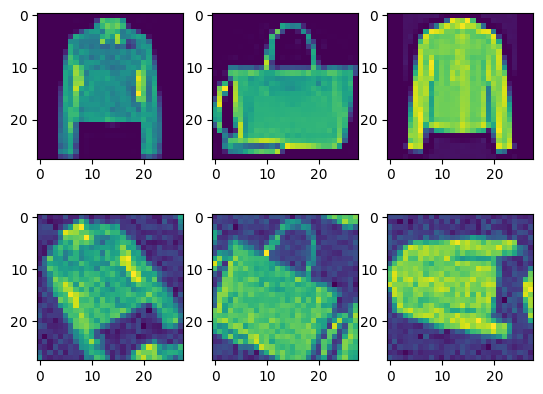

In [52]:
fig1, axs1 = plt.subplots(2, 3)
axs1[0, 0].imshow(x_train[0])
axs1[1, 0].imshow(x_train_noisy[0])
axs1[0, 1].imshow(x_test[0])
axs1[1, 1].imshow(x_test_noisy[0])
axs1[0, 2].imshow(x_val[0])
axs1[1, 2].imshow(x_val_noisy[0])


In [57]:
optimizer='adam'
learning_rate=0.0003

In [58]:
input_img = Input(shape=(28,28,1))
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(1, (3, 3), padding='same')(x8)
# Compile the model
autoencoder = Model(input_img, x9)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss=losses.MeanSquaredError())

In [ ]:
#autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [59]:
bs = 512
eps = 70

In [60]:
# @title Default title text
callback = EarlyStopping(monitor='loss', patience=10)
history = autoencoder.fit_generator( datagen.flow(x_train, x_train, batch_size=bs),
                                      epochs=eps, steps_per_epoch = x_train.shape[0]//bs,
                                      validation_data=(x_val_noisy, x_val),
                                      callbacks=[callback],verbose=1)
# test batch_size , epoch, learning_rate,

<ipython-input-60-f44733330037>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = autoencoder.fit_generator( datagen.flow(x_train, x_train, batch_size=bs),


Epoch 1/70
65/65 [==============================] - 19s 287ms/step - loss: 0.0861 - val_loss: 0.0714
Epoch 2/70
65/65 [==============================] - 17s 263ms/step - loss: 0.0687 - val_loss: 0.0668
Epoch 3/70
65/65 [==============================] - 21s 320ms/step - loss: 0.0653 - val_loss: 0.0646
Epoch 4/70
65/65 [==============================] - 16s 244ms/step - loss: 0.0631 - val_loss: 0.0630
Epoch 5/70
65/65 [==============================] - 15s 233ms/step - loss: 0.0611 - val_loss: 0.0611
Epoch 6/70
65/65 [==============================] - 15s 233ms/step - loss: 0.0599 - val_loss: 0.0593
Epoch 7/70
65/65 [==============================] - 15s 234ms/step - loss: 0.0586 - val_loss: 0.0580
Epoch 8/70
65/65 [==============================] - 15s 233ms/step - loss: 0.0574 - val_loss: 0.0572
Epoch 9/70
65/65 [==============================] - 15s 231ms/step - loss: 0.0563 - val_loss: 0.0558
Epoch 10/70
65/65 [==============================] - 16s 238ms/step - loss: 0.0556 - val_lo

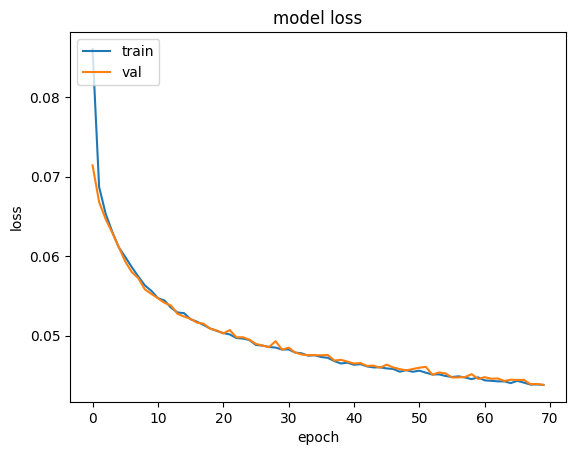

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
predictions_test = autoencoder.predict_generator(x_test_noisy)

<ipython-input-62-ff09df9e1d8a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = autoencoder.predict_generator(x_test_noisy)


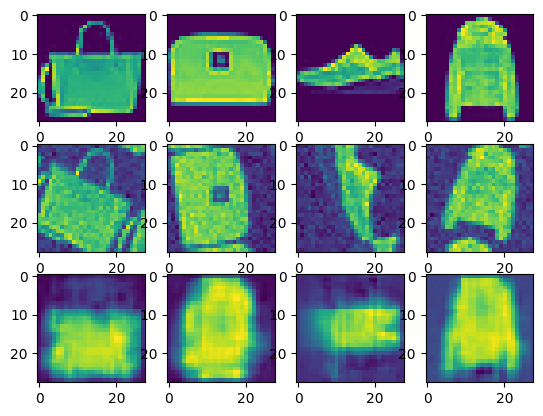

In [63]:
fig1, axs1 = plt.subplots(3, 4)
axs1[0, 0].imshow(x_test[0])
axs1[1, 0].imshow(x_test_noisy[0])
axs1[2, 0].imshow(predictions_test[0])
axs1[0, 1].imshow(x_test[1])
axs1[1, 1].imshow(x_test_noisy[1])
axs1[2, 1].imshow(predictions_test[1])
axs1[0, 2].imshow(x_test[2])
axs1[1, 2].imshow(x_test_noisy[2])
axs1[2, 2].imshow(predictions_test[2])
axs1[0, 3].imshow(x_test[3])
axs1[1, 3].imshow(x_test_noisy[3])
axs1[2, 3].imshow(predictions_test[3])